In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Fitter.fitter import Fitter
from Fitter.over_specification import over_specification,get_check

In [2]:
# calibrate the Hagan SABR model to the input data with different equal constraints
fitter=Fitter('market_data.xlsx')
fitter.input_read()
beta_check=get_check(fitter,1,[0,0.3,0.5,0.7,1])
rho_check=get_check(fitter,2,[0,-0.3,-0.5,-0.7,-0.9])
alpha_check=get_check(fitter,0,[0.2,0.4,0.6])
vega_check=get_check(fitter,3,[0.2,0.4,0.6])

**Beta Testing**

The aim is this overspecification test is to quantify the calibration quality of the Hagan approximations, and how this would be influenced by the particular $\beta$ parameter. With $\beta$ fixed, we calibrate another three parameters: $\alpha$, $\rho$ and $\nu$. We have repeated the calibration using:

$\beta=0,$

$\beta=0.3,$

$\beta=0.5,$

$\beta=0.7,$

$\beta=1.$

We also give the optimal calibration results with $\beta$ being flexible to yield the best optimization results.

From the plot below, it seems that the main effect of $\beta$ is a change in the smile slope, which will get more pronounced as $\beta$ moves from 1 to 0 (representing a switch from lognormal to normal).

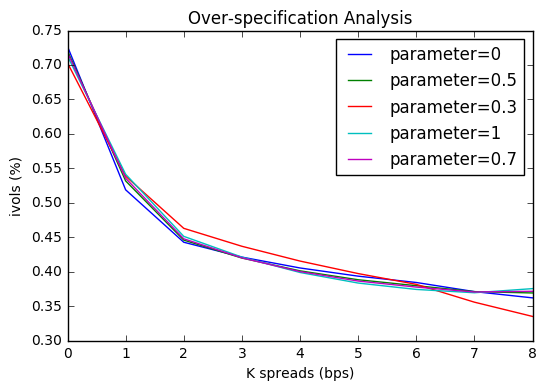

In [4]:
# conduct over-specification analysis on parameter beta
over_specification(fitter,beta_check)

**Rho Testing**

Same calibration process is applied to $\rho$ using:

$\rho=0,$

$\rho=-0.3,$

$\rho=-0.5,$

$\rho=-0.7,$

$\rho=-0.9.$

The smile is relatively steeper and of less convexity for rho closer to -1. And the effects of $\rho$ and of $\beta$ are similar，both are on the smile slope.

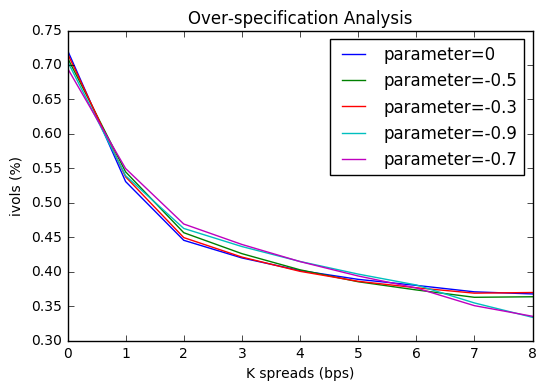

In [5]:
# conduct over-specification analysis on parameter rho
over_specification(fitter, rho_check)

**Alpha Testing**

Same calibration process is applied to $\alpha$ using:

$\alpha=0.2,$

$\alpha=0.4,$

$\alpha=0.6$

Alpha moves up and down the ivol smile with almost no changes on the smile shape.

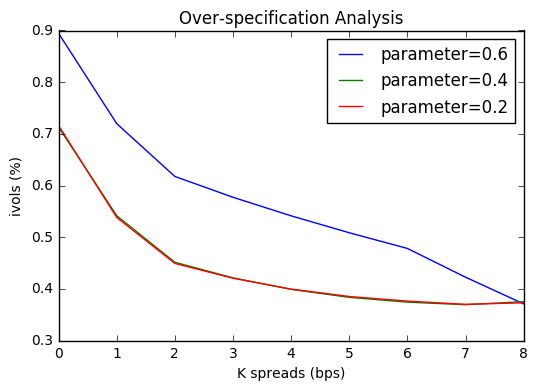

In [5]:
# conduct over-specification analysis on parameter alpha
over_specification(fitter, alpha_check)

**Vega Testing**

Same calibration process is applied to $\nu$ using:

$\nu=0.2,$

$\nu=0.4,$

$\nu=0.6$

Slight impact as vega has on the ivol smile, it changes the smile shape. It seems that higher vega leads to higher ivols for deep-in-the-money and out-of-the-money options.

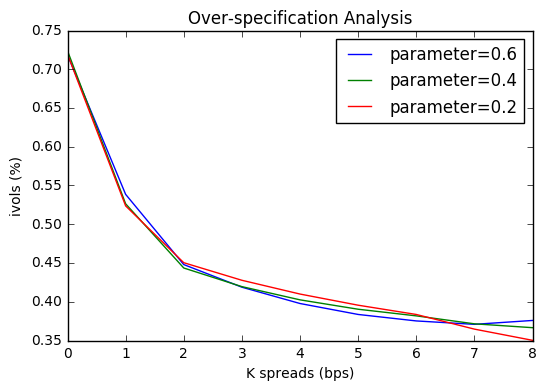

In [6]:
# conduct over-specification analysis on parameter vega
over_specification(fitter, vega_check)